In [15]:
 %load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from utils import read_file
import pandas as pd
import datetime

# basic configurations
FILE = "data/Events-Match_Test__TEAM_A_vs__TEAM_B-Period_Period_1_Period_Period_2_Period_Period_3.csv"
EVENT_TYPE = "Shifts"

# load initial dataset
df = read_file(FILE, EVENT_TYPE)
df

,Timestamp (ms),Timestamp in local format,Player ID,Name,Event type,Duration (s),Distance,Distance (speed | Very low),Distance (speed | Low),Distance (speed | Medium),Distance (speed | High),Distance (speed | Very high),Distance (speed | Sprint),Distance (speed | 0 - 0 km/h),Metabolic Power (Ø),Speed (max.),Skating Load,Skating Intensity
0,1670697995000,12/10/2022;07:46:35.000 PM,438,D TEST,Shift,34.707001,114.0,29.0,15,25,36,9,0.0,NaN,337.08,22.60,21.67,37.45
1,1670697995000,12/10/2022;07:46:35.000 PM,443,D TEST,Shift,43.952999,177.0,25.0,21,39,51,36,4.0,NaN,413.47,24.34,28.74,39.24
4,1670697995000,12/10/2022;07:46:35.000 PM,470,D3 Guest,Shift,82.765999,288.0,45.0,83,70,87,3,0.0,NaN,0.00,21.88,51.74,37.51
7,1670697995000,12/10/2022;07:46:35.000 PM,471,D4 Guest,Shift,57.615002,215.0,34.0,29,59,79,14,0.0,NaN,0.00,21.75,46.27,48.18
11,1670697995000,12/10/2022;07:46:35.000 PM,448,FW TEST,Shift,20.010000,1.0,1.0,0,0,0,0,0.0,NaN,9.93,4.64,0.49,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13052,1670705504000,12/10/2022;09:51:44.000 PM,455,FW TEST,Shift,14.317000,30.0,12.0,8,0,3,7,0.0,NaN,356.84,21.82,0.84,3.50
13085,1670705547000,12/10/2022;09:52:27.000 PM,441,D TEST,Shift,3.623000,1.0,1.0,0,0,0,0,0.0,NaN,62.98,4.88,1.34,22.15
13086,1670705547000,12/10/2022;09:52:27.000 PM,450,FW TEST,Shift,3.623000,5.0,5.0,0,0,0,0,0.0,NaN,150.85,8.24,2.60,43.10
13087,1670705547000,12/10/2022;09:52:27.000 PM,453,FW TEST,Shift,3.588000,3.0,3.0,0,0,0,0,0.0,NaN,136.72,9.65,2.40,40.19


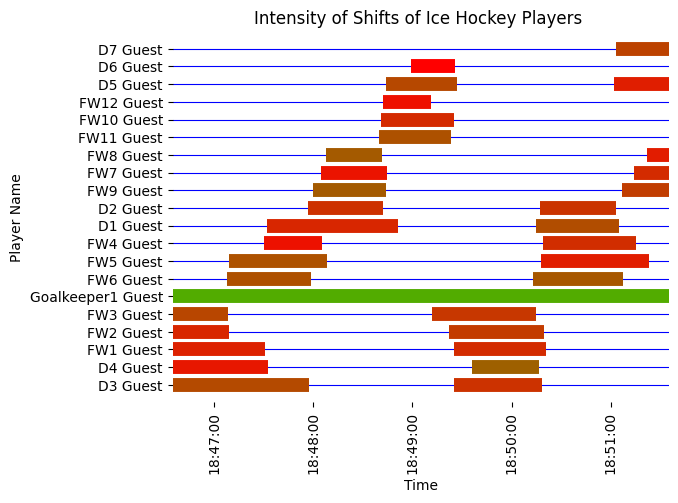

In [43]:
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

random.seed(42)

def get_colour(intensity: int) -> str:
    """
    creates a colour between green and red  according to intensity
    
    :param intensity: hockey intensity within [0,1] 
    :return: linear interpolation between green = easy and red = heavy in hex-format, e.g. #FF0000
    """
    
    # LERP between green and red
    green = int((1-intensity) * 255)
    red = int(intensity * 255)
    
    colour = "#%02x%02x%02x" % (red, green, 0) # blue value is 0
    return colour


def plot_shifts_with_intensity(df: pd.DataFrame, time_window: int):
    """
    Plots shifts of all players together with the intensity of all individual shifts
    
    ONLY WORKS FOR GUEST DATA FOR NOW.
    
    :param df: dataframe with shift data
    :param time_window:  how much time should be plotted? (in minutes)
    :return: None
    """
    
    # prepare dataframe
    df["timestamp"] = pd.to_datetime(df["Timestamp (ms)"], unit="ms")
    df["time"] = pd.to_timedelta(df["Duration (s)"], unit="sec")
    df = df[df["timestamp"] < df["timestamp"].min() + datetime.timedelta(minutes=time_window)]
    df = df[df["Name"].str.contains("Guest")]

    # create plot
    fig,ax = plt.subplots()
    
    # plot bars
    for i in df.index:
        relative_intensity = float(df["Skating Intensity"][i] / df["Skating Intensity"].max())
        ax.plot([df['timestamp'][i],df['timestamp'][i] + df['time'][i]],
                [df['Name'][i],df['Name'][i]],
                linewidth=10,
                c=get_colour(relative_intensity), #cols[df['Player ID'][i]],
                solid_capstyle = "butt")
    
    # format date on x axis
    myFmt = mdates.DateFormatter('%H:%M:%S')
    ax.xaxis.set_major_formatter(myFmt)
    plt.xticks(rotation=90)
    plt.xlim(df["timestamp"].min(), df["timestamp"].min() + datetime.timedelta(minutes=time_window))
    
    # some configurations for background
    ax.grid(axis="y", color="r")
    ax.set(frame_on=False)

    # label axes    
    plt.xlabel("Time")
    plt.ylabel("Player Name")
    plt.title("Intensity of Shifts of Ice Hockey Players ")
    
    # display plit    
    plt.show()
    
plot_shifts_with_intensity(df, 5)


## Download data from web

In [1]:
from utils import read_from_web

CRED_FILE = "credentials.json"

# CAREFUL! This dataframe is not the same as the one, when manually downloaded.
df_json = read_from_web(CRED_FILE)
df_json


,timestamp,timezone_id,game_clock,period,player_id,end_time,duration,id,event_type,league_id,...,distance_speed_category2,distance_speed_category3,distance_speed_category4,distance_speed_category5,distance_speed_category6,distance_speed_category7,metabolic_power_avg,speed_max,mechanical_load,mechanical_intensity
0,2022-12-10 18:46:35,385,,T1,448,1670697984,20.010000,377107,shift,,...,0.000000,0.000000,0.000000,0.000000,0.000000,None,9.931669,1.287685,0.490779,1.471601
1,2022-12-10 18:46:35,385,,T1,480,1670697984,33.499001,377165,shift,,...,8.197411,35.187430,20.273528,39.831921,27.866176,None,0.000000,7.883341,21.475670,38.465034
2,2022-12-10 18:46:35,385,,T1,479,1670697984,33.981998,377168,shift,,...,9.659115,21.391329,29.791200,7.219917,14.674108,None,0.000000,7.441906,25.595313,45.192127
3,2022-12-10 18:46:35,385,,T1,438,1670697984,34.707001,377176,shift,,...,14.752963,24.905243,35.882954,9.012793,0.000000,None,337.084092,6.276611,21.665259,37.453986
4,2022-12-10 18:46:35,385,,T1,443,1670697984,43.952999,377221,shift,,...,21.147269,39.062764,51.429380,36.217288,3.941377,None,413.474853,6.760299,28.742325,39.235992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,2022-12-10 20:48:06,385,,T3,478,1670705536,116.713997,393686,shift,,...,51.252059,32.754355,19.496623,37.651834,31.541697,None,0.000000,8.646162,38.667526,19.878092
707,2022-12-10 20:48:36,385,,T3,479,1670705536,104.948997,393687,shift,,...,8.565278,15.838306,20.683522,19.595637,41.207649,None,0.000000,7.754170,11.045341,6.314691
708,2022-12-10 20:51:04,385,,T3,482,1670705536,51.198002,393688,shift,,...,18.092269,18.425302,21.658868,12.885156,0.000000,None,0.000000,6.522981,26.850658,31.466843
709,2022-12-10 20:51:04,385,,T3,483,1670705536,52.439999,393689,shift,,...,13.225250,33.050651,31.557822,30.656202,41.716235,None,0.000000,8.208110,25.230377,28.867709
